# Plotear con Pandas
El método `plot()` está disponible en los objetos `Series` y `DataFrame`. Muchos de los parámetros se pasan a `matplotlib`. El argumento `kind` nos permite variar el tipo de gráfico. Estos son algunos parámetros de uso común:

| Parametros | Proposito | DataType |
| --- | --- | --- |
| `kind` | Determina el tipo de parcela | String |
| `x`/`y` | Columna(s) a trazar en el eje *x*/*y*. | String & lista |
| `ax` | Dibuja el gráfico en el objeto `Axes` proporcionado | `Axes` |
| `subplots` | Determina si se realizan subtramas | Boolean |
| `layout` | Especifica cómo organizar las subparcelas | Tupla de `(rows, columns)` |
| `figsize` | Tamaño para hacer el objeto `Figure | Tupla de `(width, height)` | 
| `title` | El título de la trama o subtramas | String para el título de la trama o una lista de string para los títulos de las subtramas. |
| `legend` | Determina si se muestra la leyenda | Boolean |
| `label` | Cómo llamar a un elemento en la leyenda | String si se está trazando una sola columna; en caso contrario, una lista de string |
| `style` | `matplotlib` cadenas de estilo para cada elemento trazado | String si se está trazando una sola columna; en caso contrario, una lista de string |
| `color` | El color para trazar el elemento en | String o tuple roja, verde, azul si se traza una sola columna; en caso contrario, una lista |
| `colormap` | El mapa de colores a utilizar | String o `matplotlib` objeto mapa de colores |
| `logx`/`logy`/`loglog` | Determina si se utiliza una escala logarítmica para el eje *x*, el eje *y* o ambos. | Boolean |
| `xticks`/`yticks` | Determina dónde dibujar las marcas en el eje *x*/*y*. | Lista de valores |
| `xlim`/`ylim` | Los límites de los ejes *x*/*y*. | Tupla de la forma `(min, max)` |
| `rot` | El ángulo en el que se escribirán las etiquetas | Int |
| `sharex`/`sharey` | Determina si las subparcelas comparten el eje *x*/*y*. | Boolean |
| `fontsize` | Controla el tamaño de las etiquetas | Int |
| `grid` | Activa/desactiva las líneas de la cuadrícula | Boolean |

## Acerca de los datos
En este cuaderno, trabajaremos con 3 conjuntos de datos:
- La cotización de las acciones de Facebook a lo largo de 2018 (obtenida mediante el[`stock_analysis` package](https://github.com/stefmolin/stock-analysis))
- Datos sísmicos del 18 de septiembre de 2018 al 13 de octubre de 2018 (obtenidos del Servicio Geológico de Estados Unidos (USGS) mediante el programa [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/))
- Centro Europeo para la Prevención y el Control de las Enfermedades (ECDC) [daily number of new reported cases of COVID-19 by country worldwide dataset](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide) cobrado el 19 de septiembre de 2020 a través de [this link](https://opendata.ecdc.europa.eu/covid19/casedistribution/csv)

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

## Evolución en el tiempo
Los gráficos de líneas nos ayudan a ver cómo cambia una variable a lo largo del tiempo. Son los predeterminados para el argumento `kind`, pero podemos pasar `kind='line'` para ser explícitos en nuestra intención:

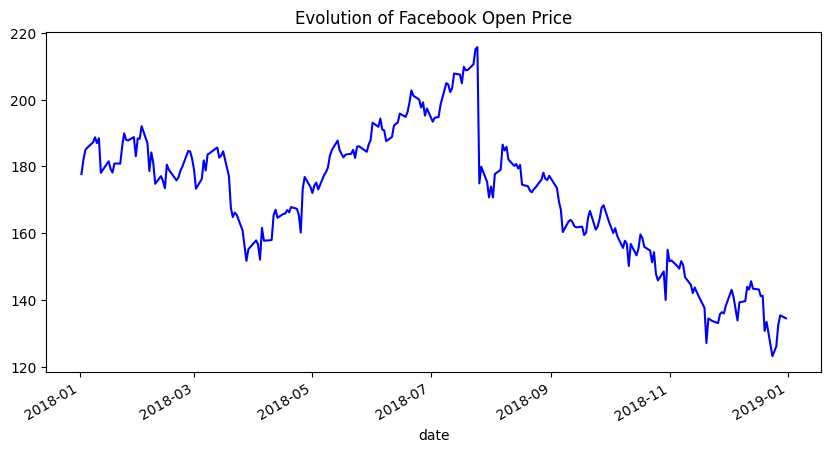

In [5]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    style='-b',
    legend=False,
    title='Evolution of Facebook Open Price'
);

En el ejemplo anterior proporcionamos el argumento `style`; sin embargo, podemos utilizar los argumentos `color` y `linestyle` para obtener el mismo resultado:

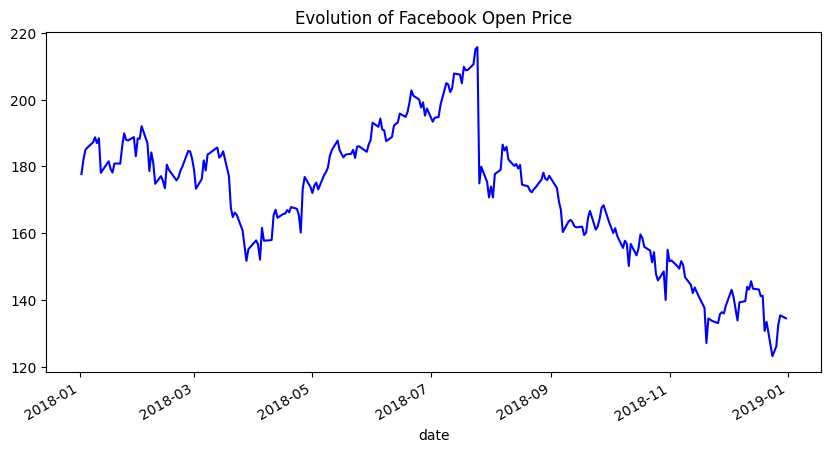

In [4]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    color='blue',
    linestyle='solid',
    legend=False,
    title='Evolution of Facebook Open Price'
);

También podemos trazar muchas líneas a la vez simplemente pasando una lista de las columnas a trazar:

C:\Users\ortiz\AppData\Local\Temp\ipykernel_13332\2558019465.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.first('1W').plot(


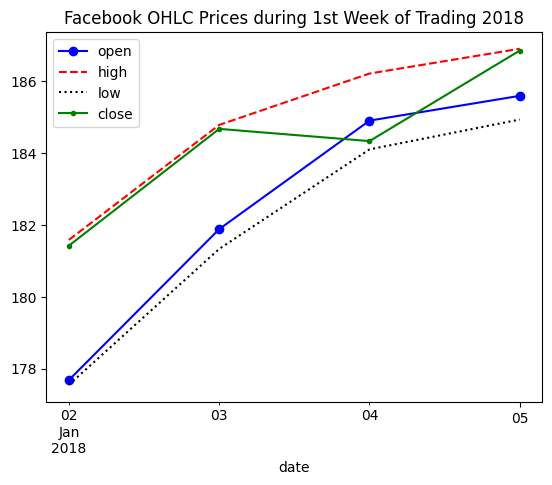

In [9]:
fb.first('1W').plot(
    y=['open', 'high', 'low', 'close'],
    style=['o-b', '--r', ':k', '.-g'],
    title='Facebook OHLC Prices during 1st Week of Trading 2018'
).autoscale()

### Creación de subparcelas
Al trazar con `pandas`, crear subtrazados es simplemente cuestión de pasar `subplots=True` al método `plot()`, y (opcionalmente) especificar el `layout` en una tupla de `(filas, columnas)`:

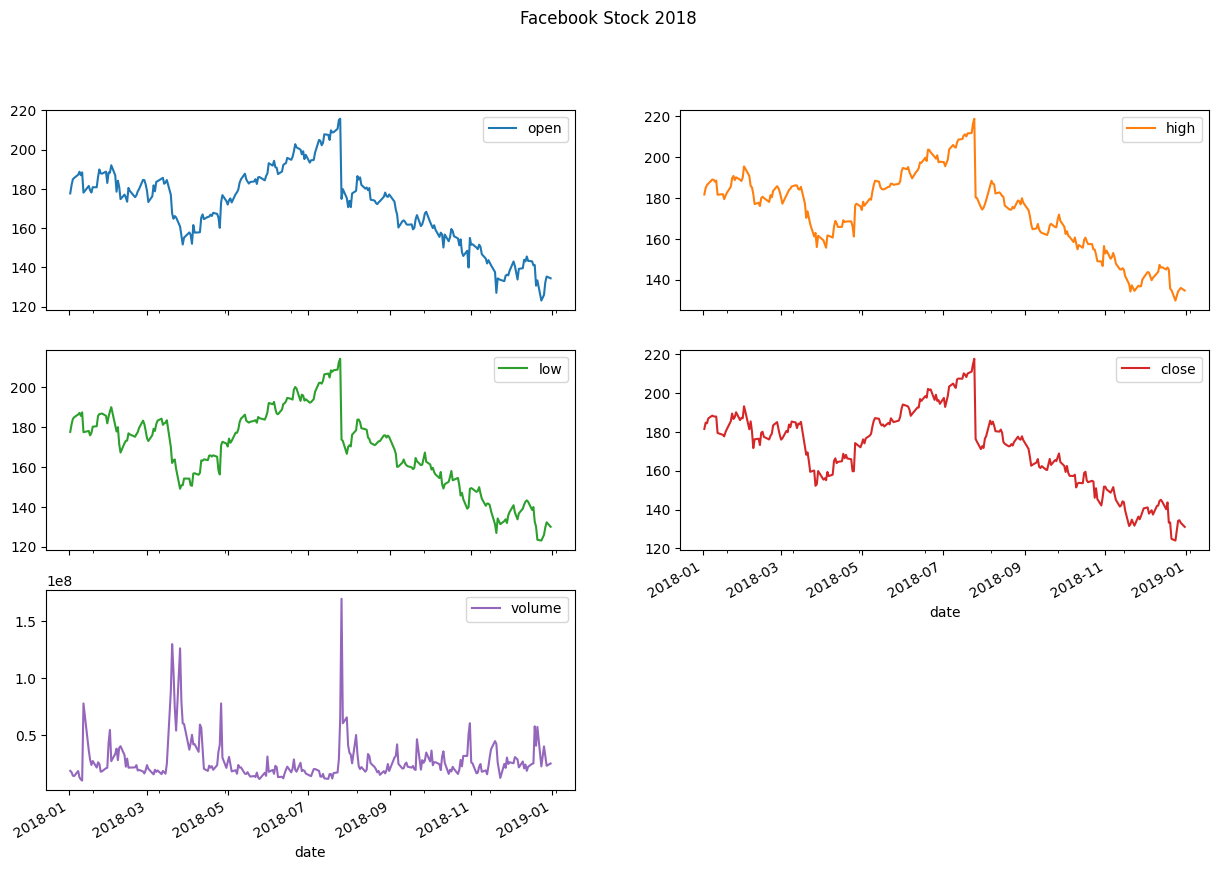

In [10]:
fb.plot(
    kind='line',
    subplots=True,
    layout=(3, 2),
    figsize=(15, 10),
    title='Facebook Stock 2018'
);

Tenga en cuenta que no proporcionamos una columna específica para trazar y `pandas` trazó todos ellos para nosotros.

A veces queremos hacer subtrazados que contengan unas pocas variables para compararlas. Esto se puede lograr utilizando el parámetro `ax`. Para ilustrar esto, echemos un vistazo a los nuevos casos diarios de COVID-19 en China, España, Italia, EE.UU., Brasil e India:

In [11]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()

Como hay mucha fluctuación en estos valores, trazaremos la media móvil de 7 días de nuevos casos utilizando el método `rolling()` (discutido en el capítulo 4). En lugar de crear un gráfico separado para cada país (lo que dificulta la comparación) o representarlos todos juntos (lo que dificultaría ver los valores más pequeños), representaremos los países que han tenido un número similar de casos en el mismo subgrupo:

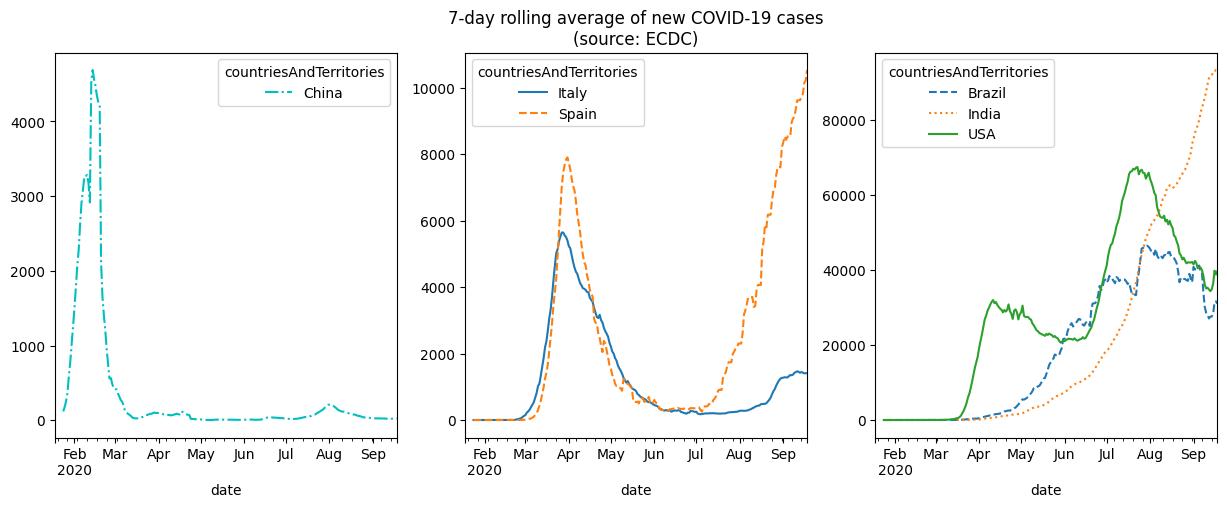

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-']);

*NOTA: especificamos aquí los estilos de línea para que las líneas puedan distinguirse en el texto como una imagen en blanco y negro.*

En la figura anterior, pudimos comparar países con niveles similares de nuevos casos de COVID-19, pero no pudimos compararlos todos en el mismo gráfico debido a la escala. Una forma de evitarlo es utilizar un **gráfico de área**, que nos permite visualizar la media móvil global de 7 días de nuevos casos de COVID-19 y, al mismo tiempo, la contribución de cada país al total. En aras de la legibilidad, agruparemos Italia y España y crearemos otra categoría para los países distintos de EE.UU., Brasil e India. La altura combinada de las áreas del gráfico es el valor global, y la altura de la región sombreada dada es el valor para el país individual.

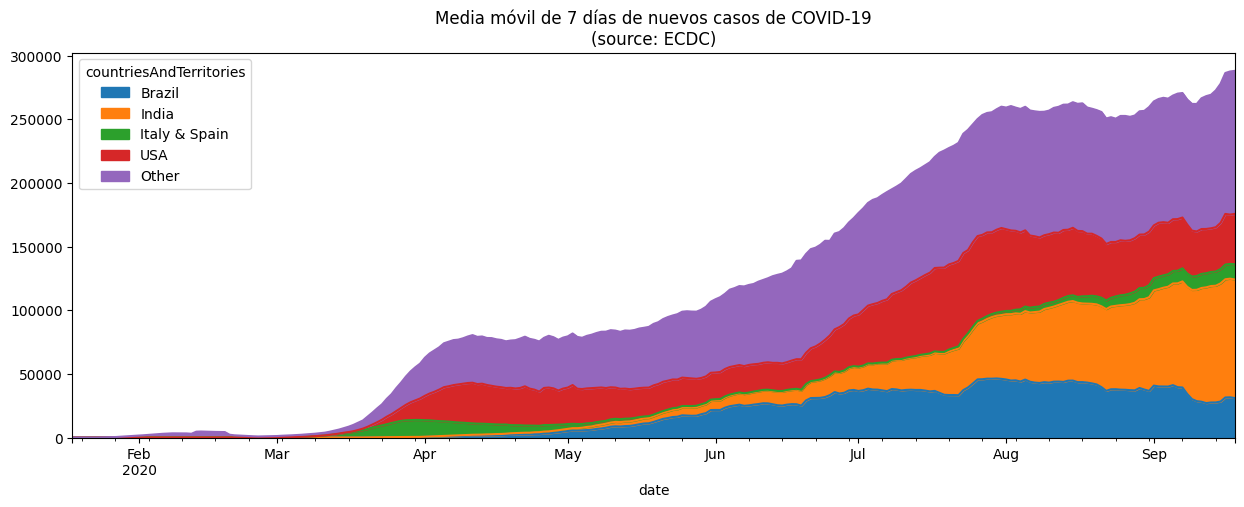

In [18]:
plot_cols = ['Brazil', 'India', 'Italy & Spain', 'USA', 'Other']
grouped = ['Italy', 'Spain']
other_cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in plot_cols
]

new_cases_rolling_average.sort_index(axis=1).assign(
    **{
        'Italy & Spain': lambda x: x[grouped].sum(axis=1),
        'Other': lambda x: x[other_cols].drop(columns=grouped).sum(axis=1)
    }
)[plot_cols].plot(
    kind='area', figsize=(15, 5), 
    title='Media móvil de 7 días de nuevos casos de COVID-19\n(source: ECDC)'
);

Otra forma de visualizar la evolución en el tiempo es observar la suma acumulada a lo largo del tiempo. Vamos a trazar el número acumulado de casos de COVID-19 en China, España, Italia, EE.UU., Brasil e India, utilizando `ax` para crear subtrazados como hicimos en el ejemplo anterior.

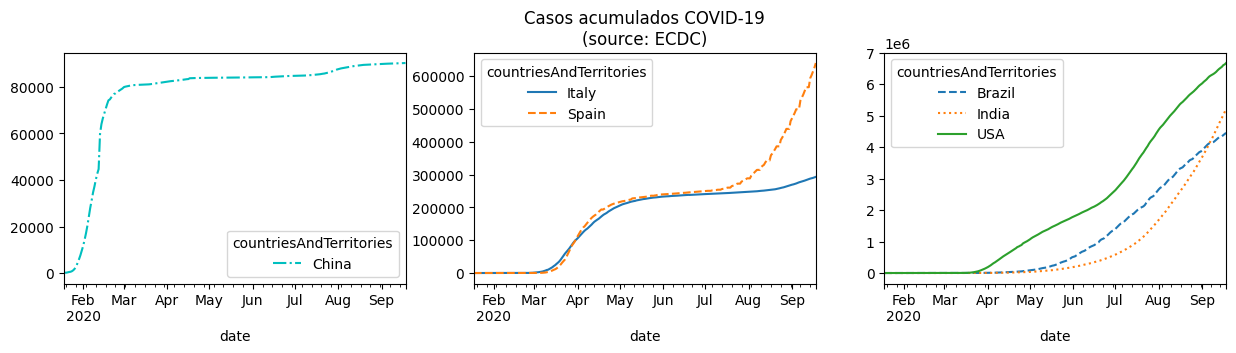

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

cumulative_covid_cases = covid.groupby(
    ['countriesAndTerritories', pd.Grouper(freq='1D')]
).cases.sum().unstack(0).apply('cumsum')

cumulative_covid_cases[['China']].plot(ax=axes[0], style='-.c')
cumulative_covid_cases[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='Casos acumulados COVID-19\n(source: ECDC)'
)
cumulative_covid_cases[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-']);

*NOTA: especificamos aquí los estilos de línea para que las líneas puedan distinguirse en el texto como una imagen en blanco y negro.*

## Visualización de relaciones entre variables

### Gráficos de dispersión
Hacemos gráficos de dispersión para ayudar a visualizar la relación entre dos variables. La creación de gráficos de dispersión requiere que pasemos `kind='scatter'` junto con una columna para el eje x y otra para el eje y:

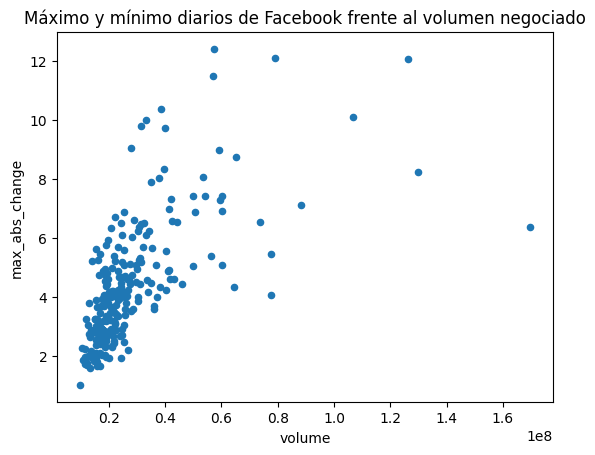

In [21]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Máximo y mínimo diarios de Facebook frente al volumen negociado'
);

La relación no parece ser lineal, pero podemos probar con una transformación logarítmica en el eje x, ya que las escalas de los ejes son muy diferentes. Con `pandas`, simplemente pasamos `logx=True`:

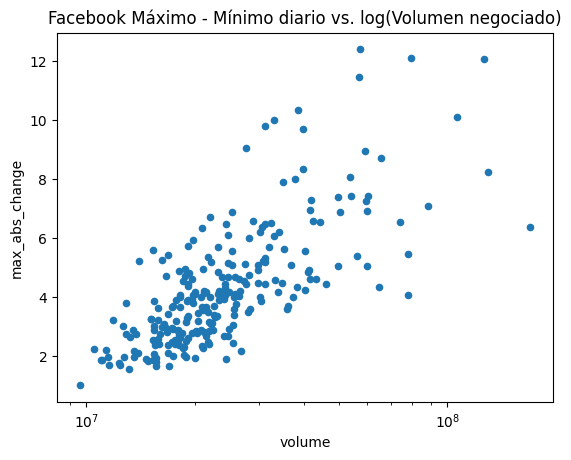

In [22]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Máximo - Mínimo diario vs. log(Volumen negociado)', 
    logx=True
);

Con `matplotlib`, podríamos usar `plt.xscale('log')` para hacer lo mismo.

### Añadir transparencia a los gráficos con `alpha`
A veces nuestros gráficos tienen muchos valores superpuestos, pero esto puede ser imposible de ver. Esto se puede solucionar aumentando la transparencia de lo que estamos trazando utilizando el parámetro `alpha`. Es un flotador en el rango [0, 1] donde 0 es completamente transparente y 1 es completamente opaco. Por defecto es 1, así que vamos a poner un valor más bajo y volver a trazar el gráfico de dispersión:

<AxesSubplot:title={'center':'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

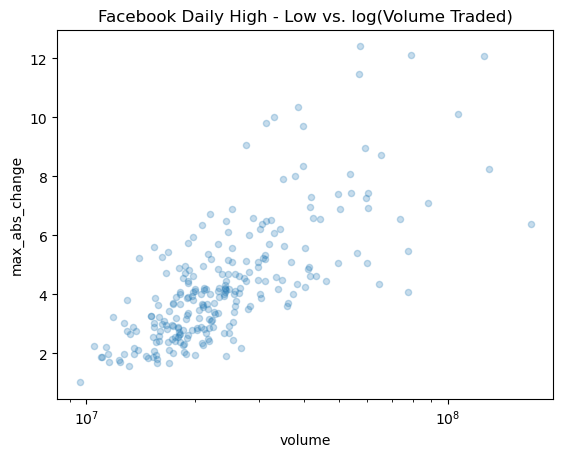

In [12]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Máximo - Mínimo diario vs. log(Volumen negociado)',
    logx=True, alpha=0.25
)

### Hexbins
En el ejemplo anterior, podemos empezar a ver los solapamientos, pero sigue siendo difícil. Los hexágonos son otro tipo de gráfico que divide el gráfico en hexágonos, que se sombrean de acuerdo con la densidad de puntos. Con `pandas`, este es el valor `hexbin` para el argumento `kind`. También puede ser necesario ajustar el `gridsize`, que determina el número de hexágonos a lo largo del eje y:

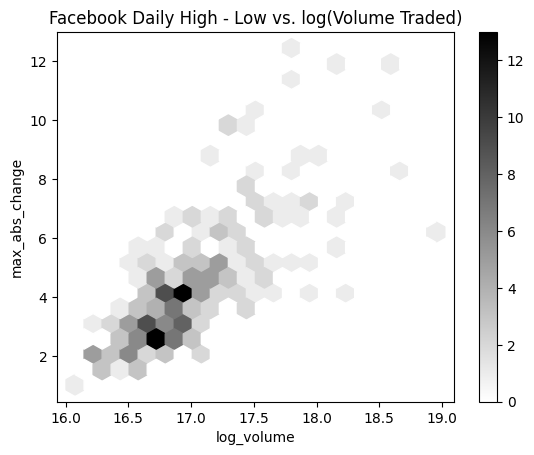

In [24]:
fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).plot(
    kind='hexbin',
    x='log_volume',
    y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    colormap='gray_r',
    gridsize=20, 
    sharex=False # tenemos que pasar esto para ver el eje x
);

### Visualización de Correlaciones con Heatmaps
Pandas no ofrece mapas de calor; sin embargo, si somos capaces de obtener nuestros datos en una matriz, podemos utilizar `matshow()` de matplotlib:

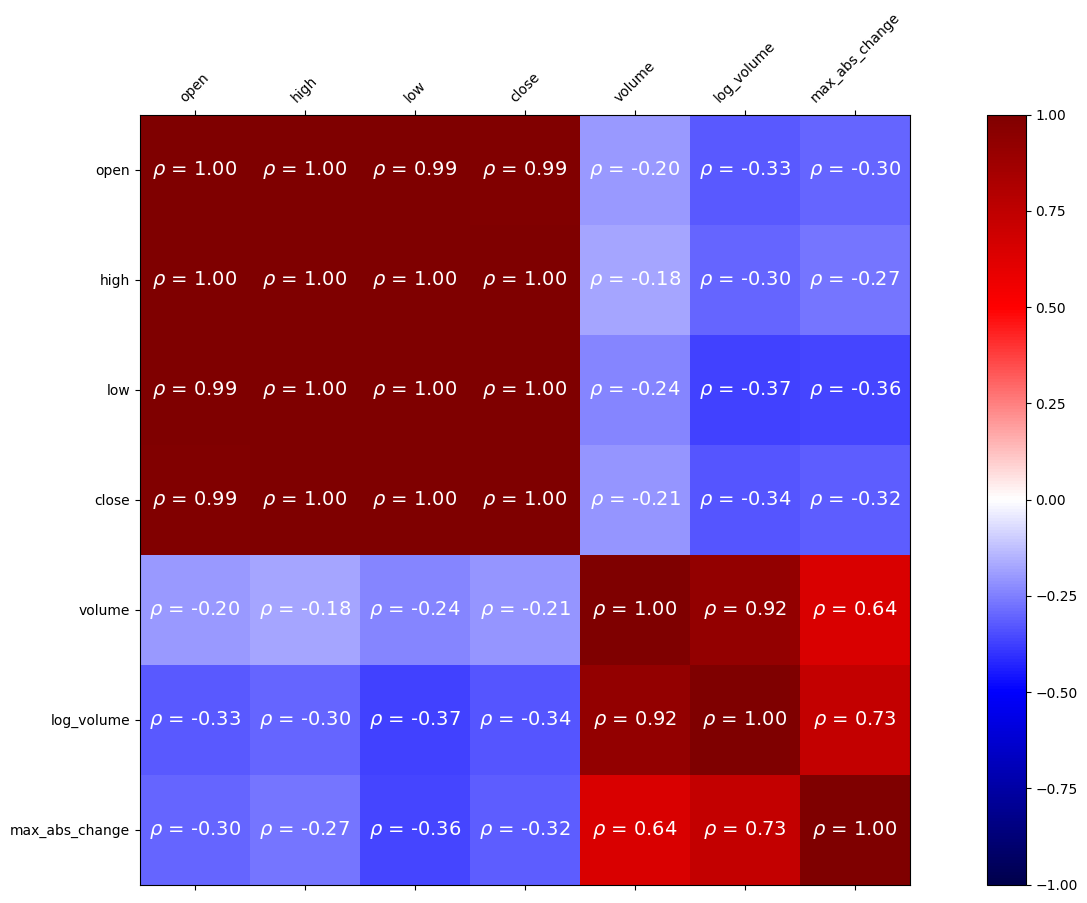

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))

# calcular la matriz de correlaciones
fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()

# crear el mapa de calor y la barra de color
im = ax.matshow(fb_corr, cmap='seismic')
im.set_clim(-1, 1)
fig.colorbar(im)

# etiqueta las marcas con los nombres de las columnas
labels = [col.lower() for col in fb_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1]) # to handle bug in matplotlib
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1]) # to handle bug in matplotlib
ax.set_yticklabels(labels)

# incluir el valor del coeficiente de correlación en las casillas
for (i, j), coef in np.ndenumerate(fb_corr):
    ax.text(
        i, j, fr'$\rho$ = {coef:.2f}', # raw (r), format (f) string
        ha='center', va='center', 
        color='white', fontsize=14
    );

Se puede acceder a los valores de la matriz de correlaciones con `loc[]`:

In [15]:
fb_corr.loc['max_abs_change', ['volume', 'log_volume']]

volume        0.642027
log_volume    0.731542
Name: max_abs_change, dtype: float64

## Visualización de distribuciones

### Histogramas
Con las `pandas`, hacer histogramas es tan fácil como pasar `kind='hist'` al método `plot()`:

Text(0.5, 0, 'Volume traded')

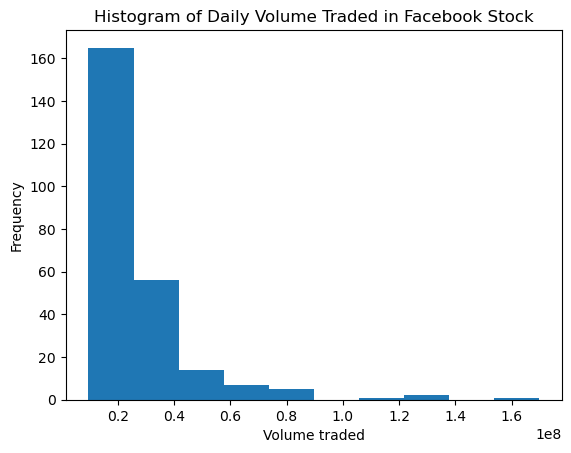

In [16]:
fb.volume.plot(
    kind='hist', 
    title='Histograma del volumen diario negociado en acciones de Facebook'
)
plt.xlabel('Volume traded') # etiquetar el eje x (tratado en el capítulo 6)

Podemos superponer histogramas para comparar distribuciones siempre que utilicemos el parámetro `alpha`. Por ejemplo, comparemos el uso y la magnitud de las distintas técnicas de medición (la columna `magType`) en los datos:

Text(0.5, 0, 'magnitude')

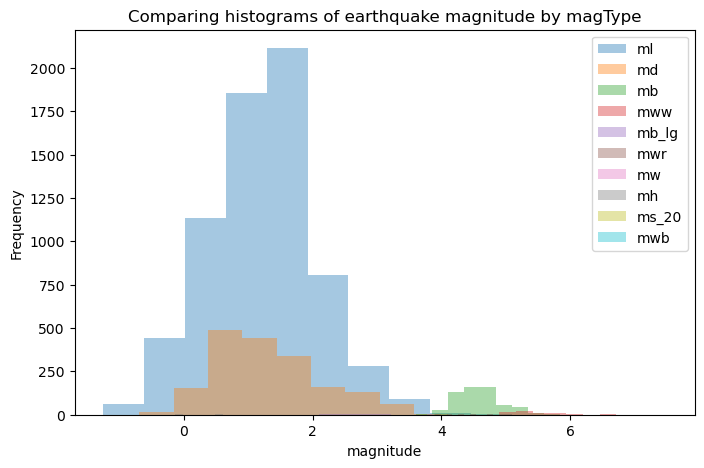

In [17]:
fig, axes = plt.subplots(figsize=(8, 5))

for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(
            kind='hist', ax=axes, alpha=0.4, 
            label=magtype, legend=True,
            title='Comparación de histogramas de magnitud de terremotos por magType'
        )

plt.xlabel('magnitude') # etiquetar el eje x

### Estimación de la densidad del núcleo (KDE)
Podemos pasar `kind='kde'` para obtener una estimación de la función de densidad de probabilidad (PDF), que nos indica la probabilidad de obtener un valor determinado:

Text(0.5, 0, 'Price ($)')

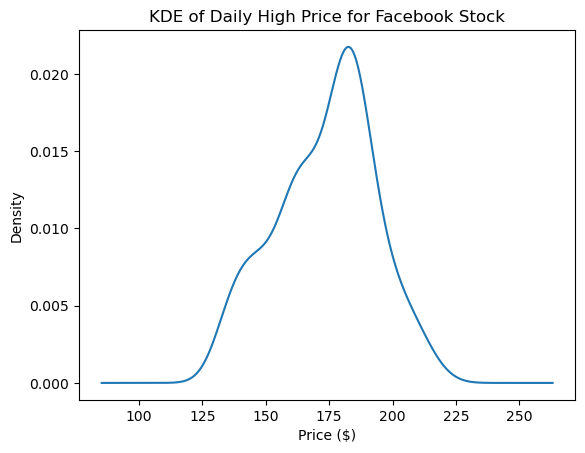

In [18]:
fb.high.plot(
    kind='kde', 
    title='KDE del precio máximo diario de las acciones de Facebook'
)
plt.xlabel('Price ($)') # etiquetar el eje x

### Añadir al resultado de `plot()`
El método `plot()` devuelve un objeto `Axes`. Podemos almacenarlo para una personalización adicional del gráfico, o podemos pasarlo a otra llamada a `plot()` como argumento `ax` para añadirlo al gráfico original.

A menudo puede ser útil ver el KDE superpuesto en la parte superior del histograma, que se puede lograr con esta estrategia:

Text(0.5, 0, 'Price ($)')

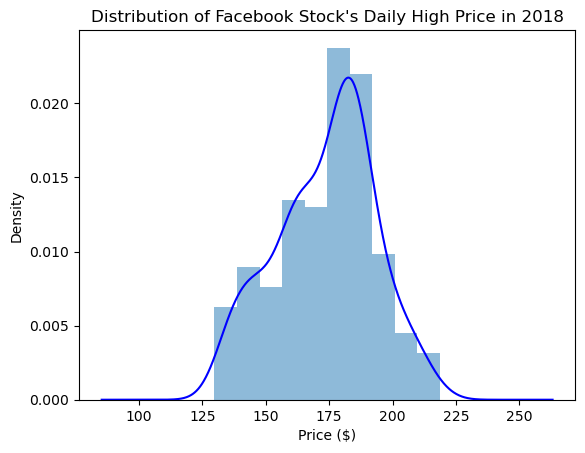

In [19]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
    ax=ax, kind='kde', color='blue', 
    title='Distribución del precio máximo diario de las acciones de Facebook en 2018'
)
plt.xlabel('Price ($)') # etiquetar el eje x

### Trazado de la ECDF
En algunos casos, nos interesa más la probabilidad de obtener un valor inferior o igual a ese valor (o superior o igual), que podemos ver con la **función de distribución acumulativa (FDA)**. Utilizando el paquete `statsmodels`, podemos estimar la CDF dándonos la **función de distribución acumulativa empírica (ECDF)**:

Text(0.5, 1.0, 'ECDF of earthquake magnitude with magType ml')

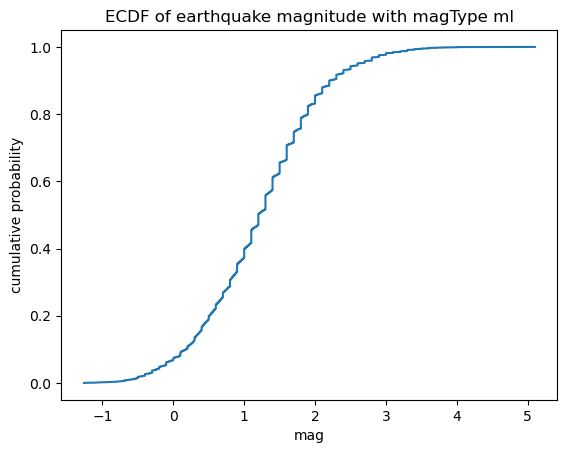

In [20]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# Etiquetas de los ejes
plt.xlabel('mag') # add x-axis label 
plt.ylabel('probabilidad acumulada') # añadir etiqueta al eje y

# añadir título
plt.title('ECDF de la magnitud del terremoto con magType ml')

Esta ECDF nos dice que la probabilidad de que se produzca un terremoto de magnitud 3 o inferior utilizando la escala `ml` es del 98%:

Text(0.5, 1.0, 'P(mag <= 3) = 98%')

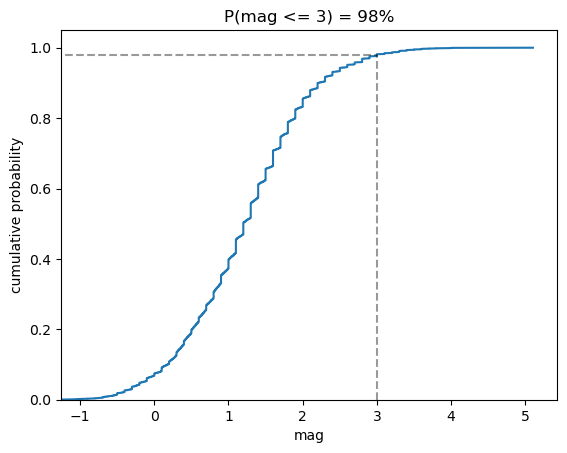

In [21]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# Etiquetas de los ejes
plt.xlabel('mag') # añadir etiqueta al eje x
plt.ylabel('probabilidad acumulada') # añadir etiqueta al eje y

# añadir líneas de referencia para interpretar la ECDF para mag <= 3
plt.plot(
    [3, 3], [0, .98], '--k', 
    [-1.5, 3], [0.98, 0.98], '--k', alpha=0.4
)

# establecer rangos de ejes
plt.ylim(0, None)
plt.xlim(-1.25, None)

# añadir un título
plt.title('P(mag <= 3) = 98%')

### Gráficos de caja
Para hacer gráficos de caja con `pandas`, pasamos `kind='box'` al método `plot()`:

Text(0, 0.5, 'price ($)')

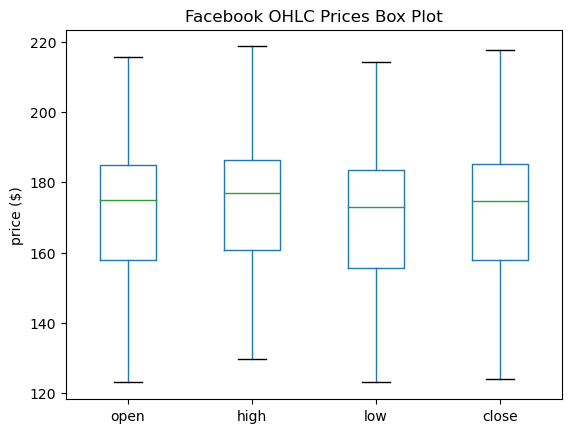

In [22]:
fb.iloc[:,:4].plot(kind='box', title='Gráfico de caja de los precios de OHLC en Facebook')
plt.ylabel('price ($)') # etiquetar el eje y

Si introducimos `notch=True`, obtendremos un gráfico de caja con muescas. La muesca representa un intervalo de confianza del 95% alrededor de la mediana, lo que puede ser útil al comparar diferencias. Para una introducción a la interpretación de un gráfico de caja con muescas, véase esto [Google sites page](https://sites.google.com/site/davidsstatistics/home/notched-box-plots) y esto [Towards Data Science article](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).

Text(0, 0.5, 'price ($)')

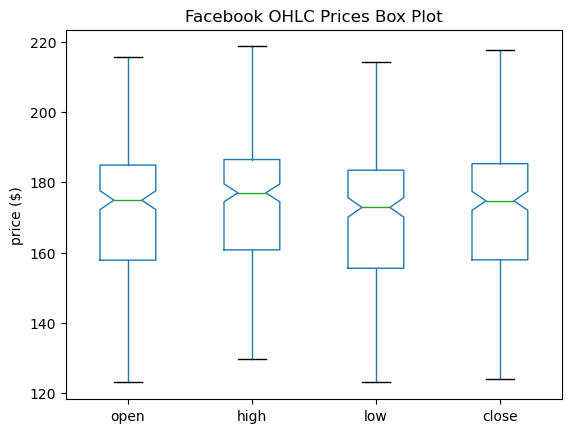

In [23]:
fb.iloc[:,:4].plot(kind='box', title='Gráfico de caja de los precios OHLC de Facebook', notch=True)
plt.ylabel('price ($)') # etiquetar el eje y

También se puede combinar con una llamada a `groupby()`:

Text(0.5, 1.1, 'Facebook OHLC Box Plots by Volume Traded')

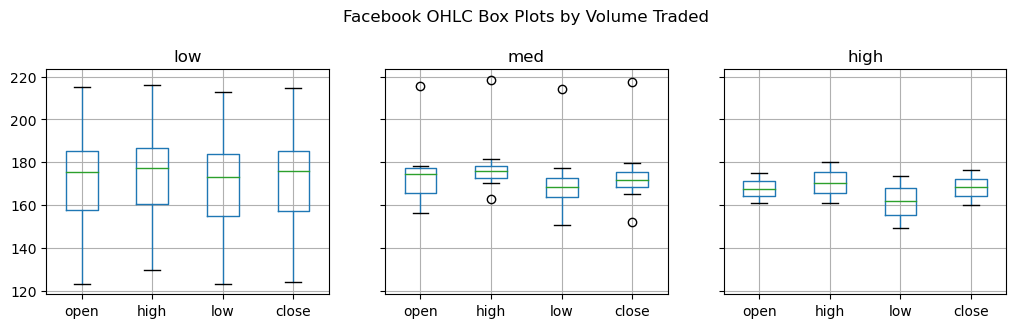

In [24]:
fb.assign(
    volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])
).groupby('volume_bin').boxplot(
    column=['open', 'high', 'low', 'close'],
    layout=(1, 3), figsize=(12, 3)
)
plt.suptitle('Facebook OHLC Box Plots por volumen negociado', y=1.1)

Podemos utilizarlo para ver la distribución de magnitudes en los distintos métodos de medición de terremotos:

Text(0, 0.5, 'magnitude')

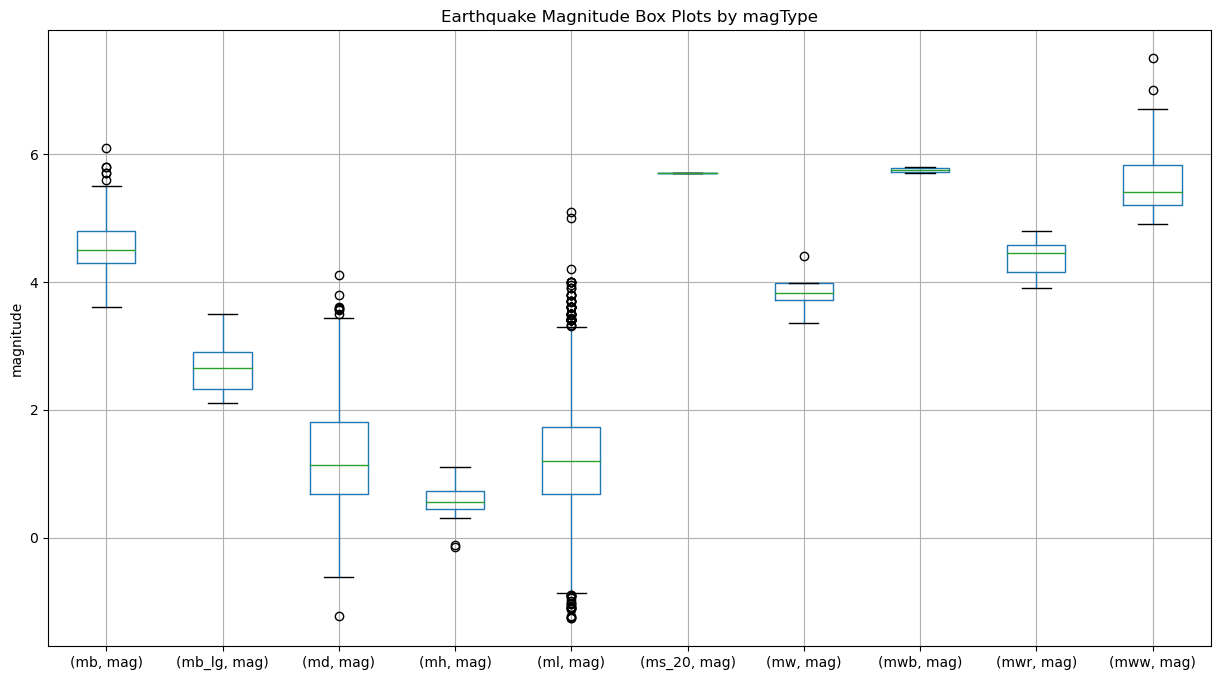

In [25]:
quakes[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
)
plt.title('Gráficos de cajas de magnitudes de terremotos por magType')
plt.ylabel('magnitude') # etiquetar el eje y

## Recuentos y frecuencias
### Gráficos de barras
Si pasamos `kind='barh'` obtendremos barras horizontales, mientras que si pasamos `kind='bar'` obtendremos barras verticales. Utilicemos barras horizontales para ver los 15 lugares con más terremotos de nuestros datos:

Text(0.5, 0, 'earthquakes')

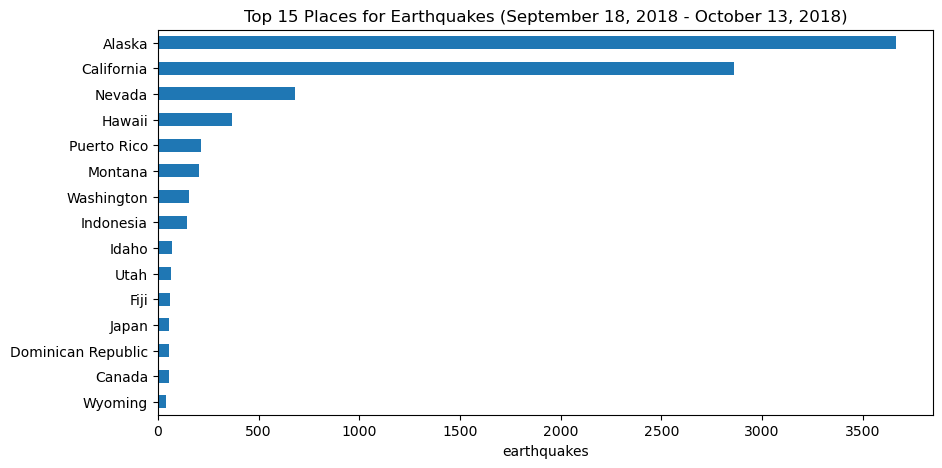

In [26]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5),
    title='Los 15 lugares con más terremotos '
          '(Septiembre 18, 2018 - Octubre 13, 2018)'
)
plt.xlabel('earthquakes') # etiquetar el eje x

También tenemos datos sobre si los terremotos fueron acompañados de tsunamis. Veamos cuáles son los lugares con más tsunamis:

Text(0.5, 0, 'tsunamis')

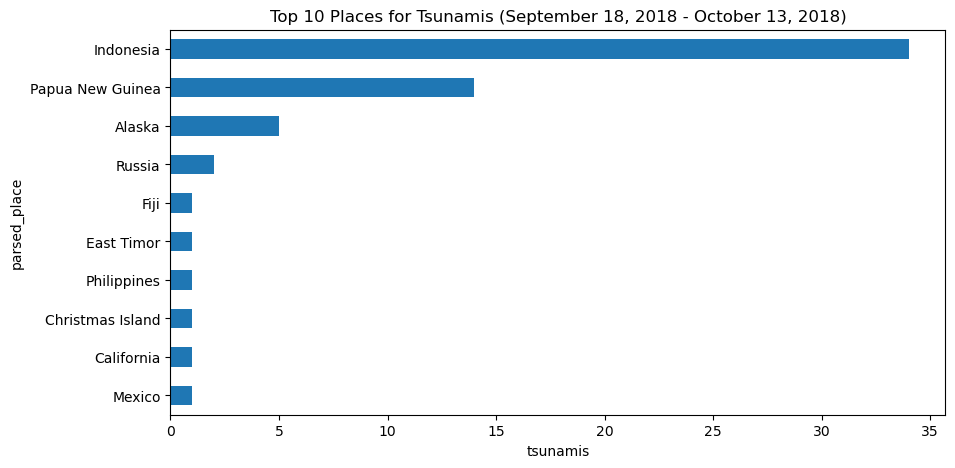

In [27]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10:,].plot(
    kind='barh', figsize=(10, 5), 
    title='Los 10 mejores lugares para los tsunamis'
          '(Septiembre 18, 2018 - Octubre 13, 2018)'
)
plt.xlabel('tsunamis') # etiquetar el eje x

Dado que Indonesia es el país con más tsunamis durante el periodo de tiempo que estamos estudiando, podemos ver cuántos terremotos y tsunamis se producen en Indonesia cada día. Como no queremos interpolar, utilizaremos barras:

Text(0, 0.5, 'count')

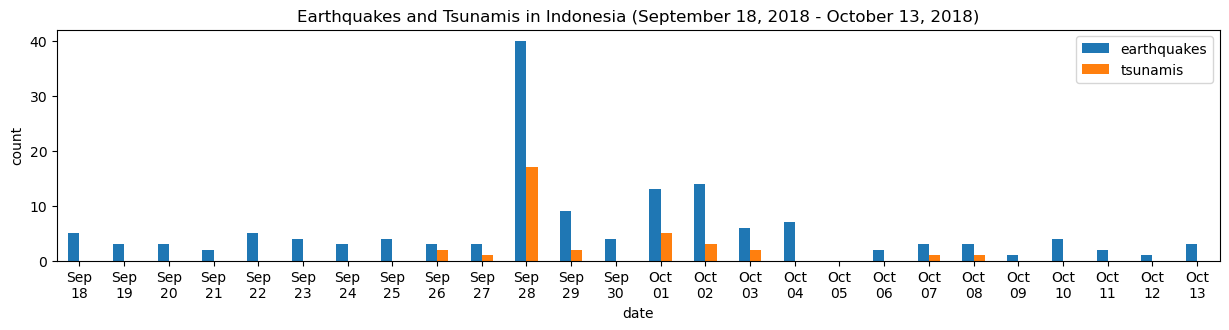

In [28]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# formatear las fechas en el índice para el eje x
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Terremotos y tsunamis en Indonesia '
          '(Septiembre 18, 2018 - Octubre 13, 2018)'
)

# etiquetar los ejes
plt.xlabel('date')
plt.ylabel('count')

### Barras Agrupadas

Text(0, 0.5, '')

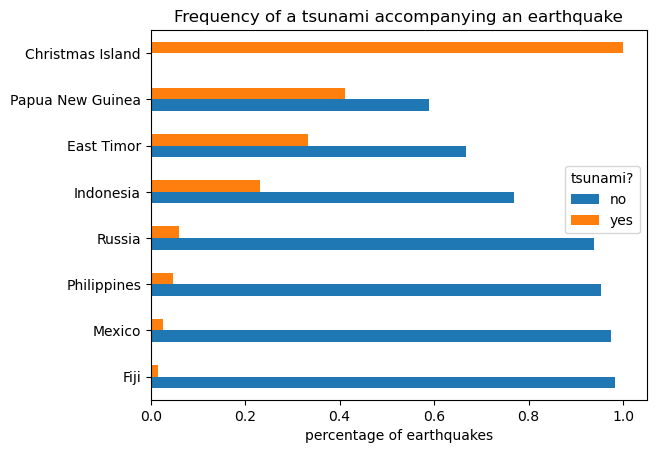

In [29]:
quakes.groupby(['parsed_place', 'tsunami']).mag.count()\
    .unstack().apply(lambda x: x / x.sum(), axis=1)\
    .rename(columns={0: 'no', 1: 'yes'})\
    .sort_values('yes', ascending=False)[7::-1]\
    .plot.barh(
        title='Frecuencia de un tsunami que acompaña a un terremoto'
    )

# mover la leyenda a la derecha del gráfico
plt.legend(title='tsunami?', bbox_to_anchor=(1, 0.65))

# etiquetar los ejes
plt.xlabel('porcentaje de terremotos')
plt.ylabel('')

Uso del argumento `kind` para barras verticales cuando las etiquetas de cada barra son más cortas:

Text(0, 0.5, 'earthquakes')

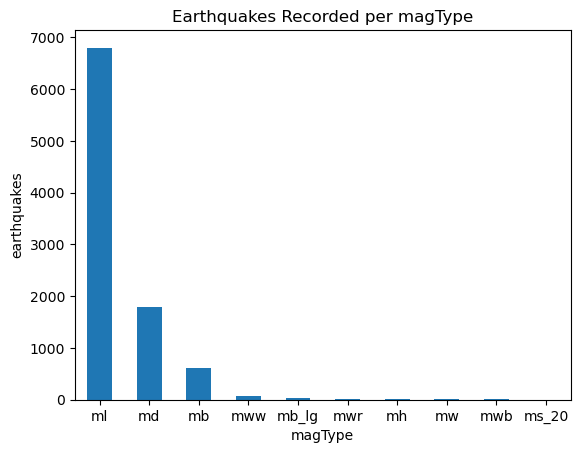

In [30]:
quakes.magType.value_counts().plot(
    kind='bar', title='Terremotos registrados por magTipo', rot=0
)

# etiquetar los ejes
plt.xlabel('magType')
plt.ylabel('earthquakes')

### Barras apiladas

<AxesSubplot:title={'center':'Earthquakes by integer magnitude and magType'}, xlabel='mag_bin', ylabel='earthquakes'>

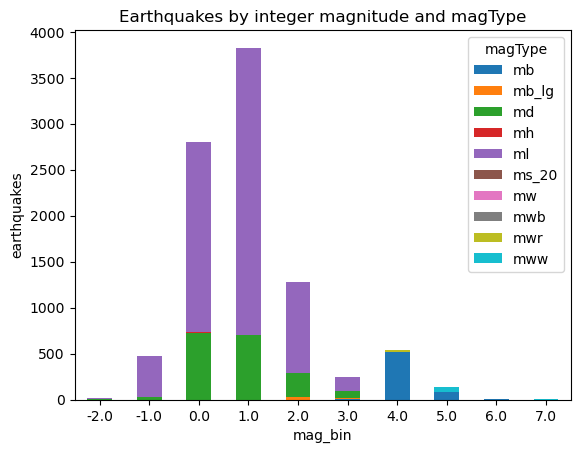

In [31]:
pivot = quakes.assign(
    mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
    index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
    stacked=True, rot=0, ylabel='earthquakes', 
    title='Terremotos por magnitud entera y magType'
)

#### Barras apiladas normalizadas
Traza los porcentajes para poder ver mejor los diferentes `magTypes`.

Text(0, 0.5, 'percentage')

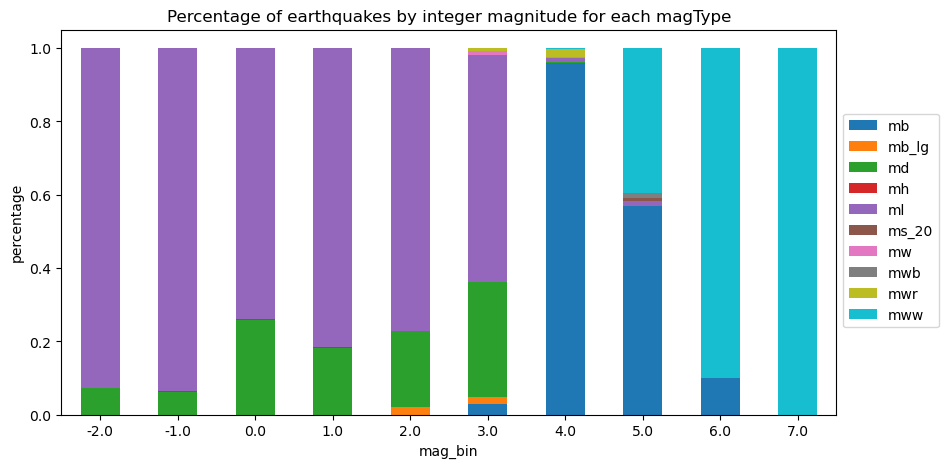

In [32]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x / x.sum(), axis=1)
ax = normalized_pivot.plot.bar(
    stacked=True, rot=0, figsize=(10, 5),
    title='Porcentaje de terremotos por magnitud entera para cada magType'
)
ax.legend(bbox_to_anchor=(1, 0.8)) # mover la leyenda a la derecha del gráfico
plt.ylabel('percentage') # etiquetar el eje y

También podemos crear barras apiladas horizontales y hacerlo utilizando `groupby()` y `unstack()`:

Text(0, 0.5, '')

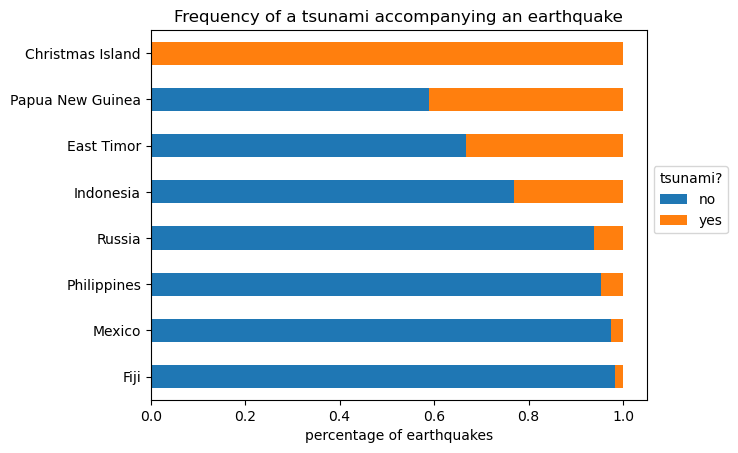

In [33]:
quakes.groupby(['parsed_place', 'tsunami']).mag.count()\
    .unstack().apply(lambda x: x / x.sum(), axis=1)\
    .rename(columns={0: 'no', 1: 'yes'})\
    .sort_values('yes', ascending=False)[7::-1]\
    .plot.barh(
        title='Frecuencia de un tsunami que acompaña a un terremoto', 
        stacked=True
    )

# mover la leyenda a la derecha del gráfico
plt.legend(title='tsunami?', bbox_to_anchor=(1, 0.65))

# etiquetar los ejes
plt.xlabel('percentage of earthquakes')
plt.ylabel('')

<hr>
<div>
    <a href="./1-introduccion_matplotlib.ipynb">
        <button>&#8592; Notebook Anterior</button>
    </a>
    <a href="./3-modulo_pandas_plot.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<hr>